<a href="https://colab.research.google.com/github/brnnwon/Miniproject_placement/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titatic Dataset

วันที่ 15 เมษายน 1912 เรือสำราญที่ขนาดใหญ่ที่สุดที่เคยถูกสร้างมาชนภูเขาน้ำแข็ง ผลจ่ากการจมของเรือ Titanic มีผู้เสียชีวิต 1,502 คน จากผู้โดยสารและลูกเรือทั้งหมด 2,224 คน

หนึ่งในเหตุผลหลักที่มีผู้เสียชีวิตจำนวนมากขนาดนี้ก็คือการที่เรือ Titanic มีจำนวนเรือกู้ชีพ (lifeboat) ไม่เพียงพอต่อจำนวนลูกเรือและผู้โดยสาร ดังนั้นโอกาสรอดชีวิตของลูกเรือโดยสารจึงไม่ได้ขึ้นกับโชคแต่เพียงอย่างเดียว ผู้โดยสารบางกลุ่มมีโอกาสรอดชีวิตมากกว่ากลุ่มอื่นๆ

### Data Description

| Variable | Definition |	Key |
| ------- | ------- |	------- |
| survival |	Survival |	0 = No, 1 = Yes |
| pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex	| |
| Age	| Age in years |	|
| sibsp |	# of siblings / spouses aboard the Titanic	|  |
| parch |	# of parents / children aboard the Titanic	|  |
| ticket	| Ticket number	|  |
| fare |	Passenger fare	|  |
| cabin |	Cabin number	|  |
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**

pclass: เป็นตัวแปรสำหรับวัดสถานะทางสังคม
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: ถ้าอายุเป็นทศนิยม จะเป็นการประมาณอายุ โดยจะเป็นในรูปแบบ xx.5

sibsp: ชุดข้อมูลนี้นิยามความสัมพันธ์ ญาติ ดังนี้
- Sibling = พี่ชาย/น้องชาย, พี่สาว/น้องสาว, ลูกพี่ลูกน้อง
- Spouse = สามี, ภรรยา

parch: ชุดข้อมูลนี้นิยามความสัมพันธ์ ครอบครัว ดังนี้
- Parent = บิดา, มารดา
- Child = ลูกสาว, ลูกชาย
- เด็กบางคนที่เดินทางกับพี่เลี้ยงจะมี parch=0


In [ ]:
#import necsessary model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('titanic_data.xlsx')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Remove the cabin feature as it contains many missing values

In [ ]:
df.drop(columns=['Cabin', 'PassengerId', 'Ticket', 'Name'], axis = 1, inplace=True)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in cols:
    print(df[col].unique())

[0 1]
[3 1 2]
['male' 'female']
['S' 'C' 'Q' nan]


Visualization

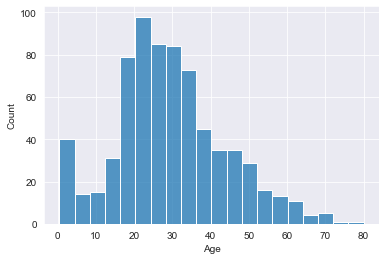

In [ ]:
#histogram plot
# plt.figure(figsize = (10,8))
sns.set_style("darkgrid")
sns.histplot(data = df, x = 'Age')
plt.show()

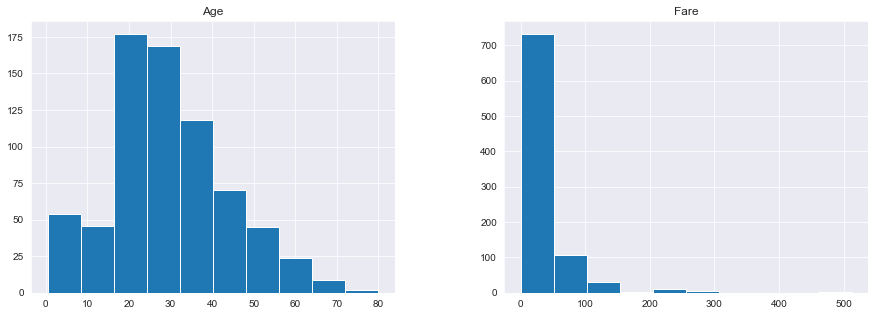

In [ ]:
df.hist(column = ['Age', 'Fare'], figsize=(15,5))
plt.show()

<AxesSubplot:>

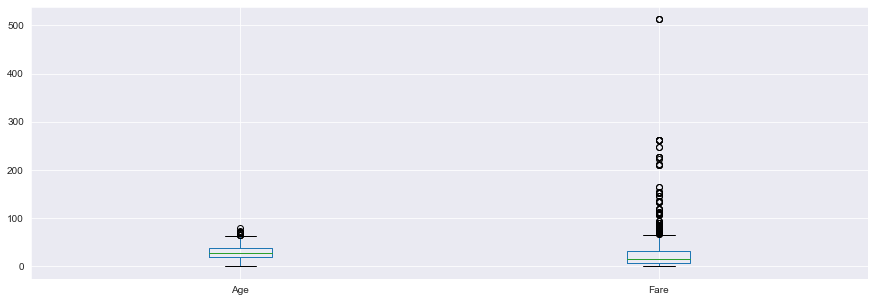

In [ ]:
df.boxplot(column=['Age', 'Fare'], figsize=(15,5))

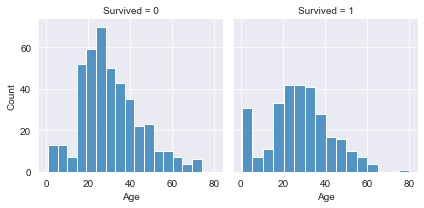

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g = g.map(sns.histplot, 'Age')
plt.show()

In [ ]:
df.groupby('Survived')[['Age','Fare']].mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


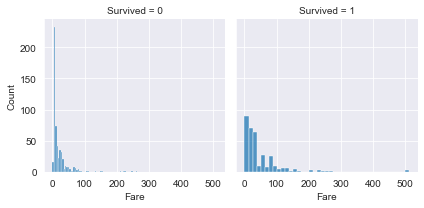

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g = g.map(sns.histplot, 'Fare')
plt.show()

Display the countplot with survived

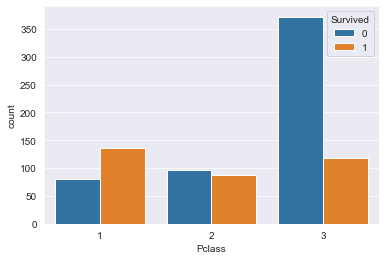

In [ ]:
sns.countplot(data = df, x = 'Pclass', hue='Survived')
plt.show()

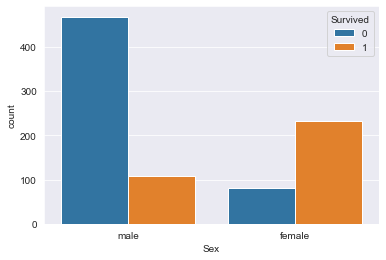

In [ ]:
sns.countplot(data = df, x = 'Sex', hue='Survived')
plt.show()

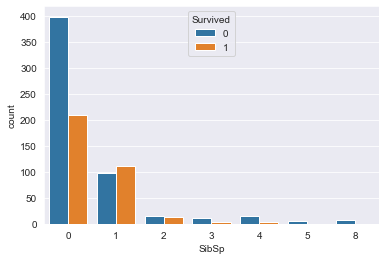

In [ ]:
sns.countplot(data = df, x = 'SibSp', hue='Survived')
plt.show()

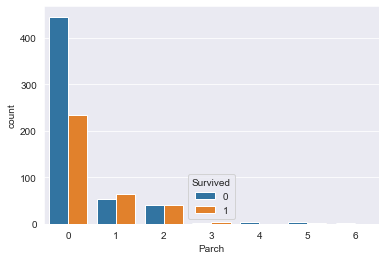

In [ ]:
sns.countplot(data = df, x = 'Parch', hue='Survived')
plt.show()

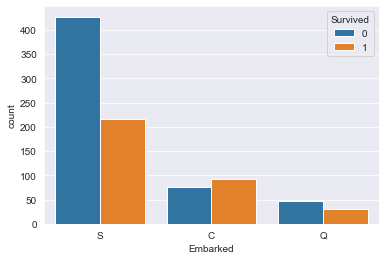

In [ ]:
sns.countplot(data = df, x = 'Embarked', hue='Survived')
plt.show()

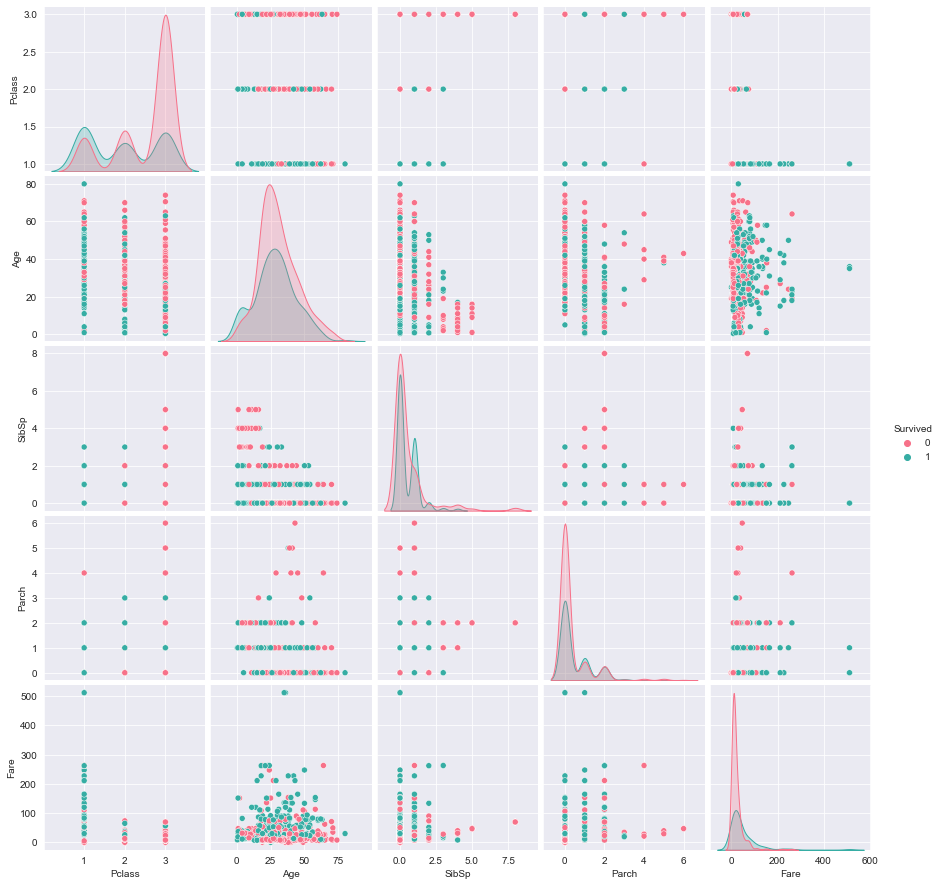

In [ ]:
sns.pairplot(df, hue = 'Survived', palette='husl')

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df[['Age', 'SibSp', 'Parch', 'Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


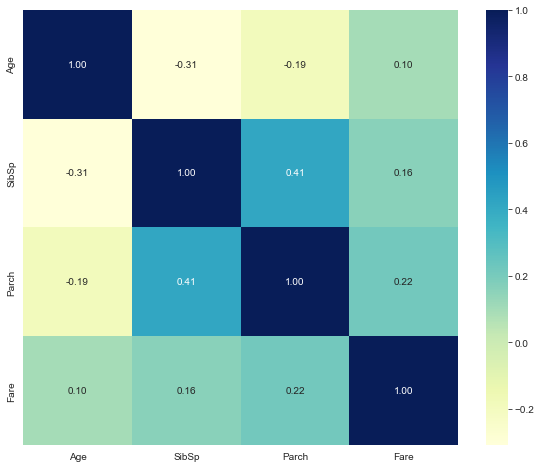

In [ ]:
plt.figure(figsize=(10,8))
plot_corr = sns.heatmap(df[['Age', 'SibSp', 'Parch', 'Fare']].corr(), square = True, annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.show()

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#FamilySize
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [ ]:
df['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [ ]:
df['Alone'] = df['FamilySize'].map(lambda x : 1 if x <=1 else 0)
df['Couple'] = df['FamilySize'].map(lambda x : 1 if x ==2 else 0)
df['Small_group'] = df['FamilySize'].map(lambda x : 1 if x <=5 else 0)
df['Large_group'] = df['FamilySize'].map(lambda x : 1 if x >=6 else 0)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Alone,Couple,Small_group,Large_group
0,0,3,male,22.0,1,0,7.2500,S,2,0,1,1,0
1,1,1,female,38.0,1,0,71.2833,C,2,0,1,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,1,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1,0


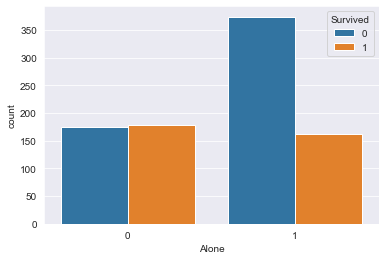

In [ ]:
sns.countplot(data = df, x = 'Alone', hue = 'Survived')
plt.show()

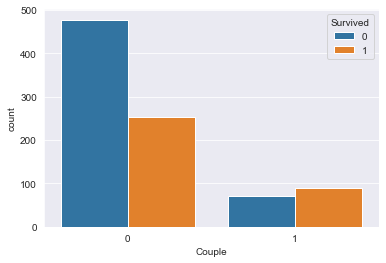

In [ ]:
sns.countplot(data = df, x = 'Couple', hue = 'Survived')
plt.show()

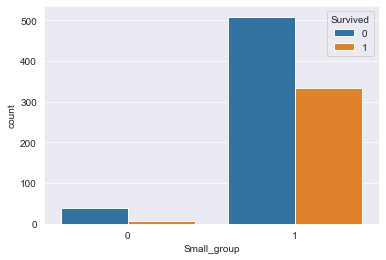

In [ ]:
sns.countplot(data = df, x = 'Small_group', hue = 'Survived')
plt.show()

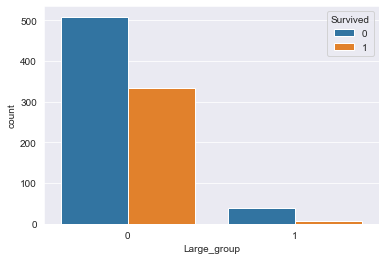

In [ ]:
sns.countplot(data = df, x = 'Large_group', hue = 'Survived')
plt.show()

In [ ]:
df.drop(columns=['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Couple,Small_group,Large_group
0,0,3,male,22.0,7.2500,S,0,1,1,0
1,1,1,female,38.0,71.2833,C,0,1,1,0
2,1,3,female,26.0,7.9250,S,1,0,1,0
3,1,1,female,35.0,53.1000,S,0,1,1,0
4,0,3,male,35.0,8.0500,S,1,0,1,0


In [ ]:
df['Sex'].replace({'male': 1, 'female': 0}, inplace = True)

In [ ]:
onehot_column = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df,onehot_column],axis=1)


In [ ]:
df[:5]

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Couple,Small_group,Large_group,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,S,0,1,1,0,0,0,1,0,0,1
1,1,1,0,38.0,71.2833,C,0,1,1,0,1,0,0,1,0,0
2,1,3,0,26.0,7.9250,S,1,0,1,0,0,0,1,0,0,1
3,1,1,0,35.0,53.1000,S,0,1,1,0,0,0,1,0,0,1
4,0,3,1,35.0,8.0500,S,1,0,1,0,0,0,1,0,0,1


In [ ]:
df.drop('Embarked',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Alone,Couple,Small_group,Large_group,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,1,1,0,0,0,1,0,0,1
1,1,1,0,38.0,71.2833,0,1,1,0,1,0,0,1,0,0
2,1,3,0,26.0,7.9250,1,0,1,0,0,0,1,0,0,1
3,1,1,0,35.0,53.1000,0,1,1,0,0,0,1,0,0,1
4,0,3,1,35.0,8.0500,1,0,1,0,0,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Alone        891 non-null    int64  
 6   Couple       891 non-null    int64  
 7   Small_group  891 non-null    int64  
 8   Large_group  891 non-null    int64  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Embarked_C   891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(7), uint8(6)
memory usage: 68.0 KB


In [ ]:
len(df[df['Survived']==0])

549

In [ ]:
len(df[df['Survived']==1])

342

<AxesSubplot:>

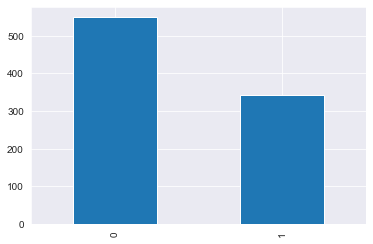

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

Training and Testing models

In [ ]:
#Import library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_roc_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#import model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X = df.drop(columns='Survived', axis=1)
y = df['Survived']

#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

print(X_train.shape)
print(y_train.shape)

(623, 14)
(623,)


In [ ]:
#K Nearest Neighbor model

#Innitiate model given n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#predict X_test
y_pred_knn = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

Accuracy: 0.7238805970149254
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       161
           1       0.69      0.55      0.61       107

    accuracy                           0.72       268
   macro avg       0.72      0.69      0.70       268
weighted avg       0.72      0.72      0.72       268



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#K Nearest Neighbor model

#Innitiate model given n_neighbors = 8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

#predict X_test
y_pred_knn = knn.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8171641791044776
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       161
           1       0.89      0.62      0.73       107

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.80       268
weighted avg       0.83      0.82      0.81       268



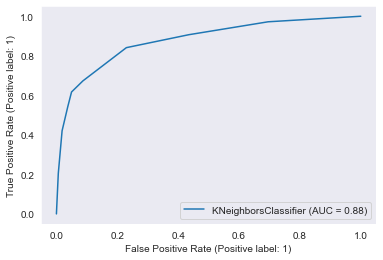

In [ ]:
plot_roc_curve(knn, X_test_scaled, y_test)
plt.grid()

In [ ]:
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1,50)}


In [ ]:
knn_cv = GridSearchCV(pipeline, param_grid=parameters)


In [ ]:
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'knn__n_neighbors': 8}
0.8009677419354839


Logistic Regression

In [ ]:
lr = LogisticRegression(C = 1)
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8208955223880597
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       161
           1       0.80      0.73      0.76       107

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



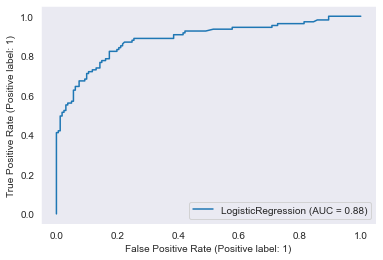

In [ ]:
plot_roc_curve(lr, X_test_scaled, y_test)
plt.grid()

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred_rf = lr.predict(X_test_scaled)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8208955223880597
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       161
           1       0.80      0.73      0.76       107

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



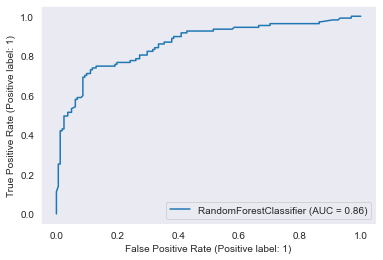

In [ ]:
plot_roc_curve(rf, X_test_scaled, y_test)
plt.grid()